# Ray Tracing
## An Exploration and Implementation of the Ray Tracing Algorithm
##### Nikolay Zhechev, SoftUni


## Abstract

Computer graphics is a rich field comprising computer science, math, and innovation, bundled into something visual that we can see on our machine's screens. It can be beautiful, meaningful, and of great importance to many industries: healthcare, manufacturing, gaming, and more. In this text, we explore one of the most fascinating topics in computer graphics: ray tracing!

Ray tracing is a fundamental part of rendering realistic 3D scenes and performing renders in ways never done before. Although the ray tracing algorithm has been around for quite some time, we are still improving and optimizing how ray tracing works on our computers. I will dive deeper into how the actual math works and why it is important to understand it. We will see how an actual ray tracer is implemented and observe it in action with a working prototype.

As mentioned above, we will not explore a new technique; instead, we will focus on refining and understanding our current knowledge due to the significant applications that ray tracing suggests. Furthermore, the explanation will show common problems and scenarios for improvement and extension, as well as provide a visual guide and representation of the ray tracer.

## Introduction

What is ray tracing? It is a technique that determines what you see by following the path of a ray that has hit your eye. By following this path, you can see what the ray intersects. It can also be described as shooting a ray from the eye and seeing what it hits. This operation is also known as ray casting. Ray casting is done recursively to form ray tracing: casting more rays to see multiple objects, where more types of rays can be introduced, such as shadow rays and rays that hit the floor and background, thus defining a whole scene. Furthermore, a light source, or even multiple ones, will be needed to illuminate the scene and cast light rays, aiding with reflections and shiny surfaces. To compute a realistic atmosphere, the scene requires reflection, refraction, diffusion, and shading.

Ray tracing excels when aiming for a realistic scene; however, it does not solve all problems. Although in its most basic form, the ray tracing algorithm is not very complex and is quite elegant, once it is scaled up, we start to encounter complications such as render time. Ray tracing tends to be more global, using global illumination and reflections between multiple objects, which requires tracing a very large number of rays. The time it takes to render thousands of rays covering the global scene can be significant. On the other hand, a popular alternative is rasterization, which uses polygons or triangles to compute the scene. Rasterization is more locally focused on each characteristic of the object and is superior in terms of render times.

To effectively implement a ray tracer, a variety of techniques must be used to optimize the process. This means that in many cases, a ray tracer is not the complete solution to computer graphics but a part of it. Casting an infinite number of rays is not feasible.

First, we will explore ray tracing at its core, understanding how basic rays can be traced and covering the fundamental math and formulas that aid in calculations. We will then implement this understanding in Python. Our goal is to achieve a basic understanding of how the algorithm works, how it can be applied, and to consider extensions and implementations.


## 1.0 Add it Toghether

### 1.1 The algorithm

### 1.2 Casting Rays

In this illustration, the scene contains several spheres and three point lights. A ray is cast from the viewpoint (A) through a point (B) in the image. The ray intersects two of the spheres but we are only interested in the intersection point (C) that is closest to the viewpoint (if there are spheres behind the blue sphere). That's the point that is visible at B in the image.

<img src="Images/Ray-tracing-fig-01.png" width="520"> fig. 1

Consider a light source, and let L be the vector that points from C in the direction of the light. If the angle between L and the normal vector is greater than 90 degrees, then the light source lies behind the surface and so does not add any illumination.

Casting a ray from C we can determine if another object is hit since it will block the light. A ray from a point on a surface in the direction of a light source is called a shadow ray, because it can be used to determine whether the surface point lies in the shadow of another object.

The reflected ray from C hits the second purple sphere at point D, so the viewer will see the reflected surface of D on point C. We can apply the ray tracing algorithm to D as we would to C in order to find the colours and create the needed reflection. 

### 1.3 Understanding light

**Ambient light:** Even though an object in a scene is not directly lit, it will still be visible. This is because light is reflected indirectly from nearby objects. A simple hack that is commonly used to model this indirect illumination is the use of an ambient light source. Ambient light has no spatial or directional characteristics; it is used as a constant for the scene.

Ambient light is the total amount of light that already exists in a scene before any artificial lighting is added. Ambient light can be used to create mood and atmosphere, but often it’s just not enough to get the desired look. To solve this, we need to add additional lights.

**Diffuse:** Diffuse light is light that is scattered in many directions and doesn't produce a mirror-like shine.

Diffuse reflection occurs when light reflects off a surface in all directions, as opposed to specular reflection, which is when light reflects off a surface in a single direction.

**Specular:** When we look at illuminated shiny surfaces, such as glittering surfaces, polished metal sheets, or apples, we observe a bright spot at certain viewing points. This phenomenon is called specular reflection.

**Lambert Shading model:** (fig. 2) when light falls obliquely on a surface, the illumination is directly proportional to the cosine $ \theta $ of the angle between the direction of the light and the surface normal. Lambert's law determines how much of the incoming light energy is reflected.

<img src="Images/Ray-tracing-fig-05.png" width="520"> fig. 2

**Blinn-Phong Shadin model:** The Phong model (fig. 3) introduces all of the above lighting components—ambient, diffuse, and specular—to enhance the scene as much as possible. The light reflected varies based on the angle between the view direction and the direction of reflection.

<img src="Images/Ray-tracing-fig-04.png" width="520"> fig. 3

The Blinn-Phong shading model (fig. 4) calculates the halfway vector between the view and light source (H). Here, the key vector is not primarily the reflection vector, but a "halfway" vector.

<img src="Images/Ray-tracing-fig-06.png" width="520"> fig. 4

To calculate the halfway vector, add the light's direction vector and the view vector together and normalize the result:
$$ H = \frac{V + L} {\lVert V + L \rVert} $$

### 1.4 Intersection

In order for the above mentioned to work properly we need to understand how intersections work and be able to calculate them effectively before we define any scene or light. Intersection will help us locate the hit point and to produce correct colours.

##### Ray Sphere intersection

The sphere is a good object to start since it is more simple to describe mathematically. We will show our Python implementation with a sphere as well. Before that let's understand and brakedown the math.

A **ray** has an origin (light source) and a direction (light direction). Ray can be described mathematically as

$$ P(t) = A + tB $$

$ P $ is the point on the ray. $ A $ is the origin and $ B $ is the direction. $ t $ is a parameter used to move $ P $ in the direction of $ B $ (fig. 3).

<img src="Images/Ray-fig-02.png" width=520> fig. 3  

A **sphere** represented in vector equation will be:
$$ ||P - C||^2 = r^2 $$

The squared magnitude of the vector difference between any point $ P $ on the sphere and the centre C is equal to the sphere of the radius $ r $. Where the dot product form is:
$$ dot((P - C), (P - C)) = r^2 $$

<img src="Images/Ray-tracing-fig-03.png" width=520> fig. 4 

**Finding the intersection points** between the ray and the sphere. We need to combine both equations for ray and sphere where:
- P is a point on the sphere.
- C is the center of the sphere.
- A is the origin point of the ray.
- B is the direction vector of the ray.
- t is a scalar parameter.

$$ dot((A + tB - C), (A + tB - C)) = r^2 $$

To expand and rearrange the equation we can derive:

$$ t^2 \cdot dot(B, B) + 2t \cdot(B, A - C) + dot(A - C, A - C) - r^2 = 0 $$

And follow the quadratic equation in the form of $ at^2 + bt + c = 0 $

where:
- $ a = dot(B, B) $
- $ b = 2 \cdot dot(B, A -C) $
- $ c = dot(A - C, A - C) - r^2 $

solve the quadratic equation with the formula:

$$ t = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$

to determine the nature of the intersection we can use the discriminant:
- if discriminant < 0: the ray does not intersect the spherel;
- if discriminant = 0: the ray is tangent to the sphere, touchin it at one point;
- if discriminant > 0: the ray intersects the sphere at two points;

##### Plane intersection

Although, I've focused on spheres and the main deliverable for the ray tracer here are spheres, I think there is importance in plances and how they can be worked out. Below is an explanation of how calcuations of plane intersection can be done.

#### Scene

Define a triangle with 3 coordinates $ \lbrace t_1, t_2, t_3 \rbrace $. Each coordinate corresponds to $ \lbrace x, y, z \rbrace $ in 3D. Add point of view or camera to the scene.

##### Plane Calculation

Calculate our trinagle plane:  
   - Describe a plane as $ \bar{p} = {a, b, c, k}$ where any value of $ {x, y, z} $ that satisfy $ aX + bY + cZ + k = 0 $ are on the plane.
   - $ a, b, c $ correspond to the orientation of the triangle. To calculate it we need to find the angle of the orthogonal line.
     

Using the cross product to get the angle of the orthogonal line:
- select two vecotrs on the plane that cross;
- using the two lines crossing $ t_1 $ calculate the angels by observing the difference in coordinates:
- angle of the orthogonal line: if $ t_1 = \lbrace -1, 0, 2 \rbrace $ and $ t_2 = \lbrace 1, 0, 1 \rbrace $ and $ t_3 = \lbrace 0, -1, 3 \rbrace $

  $$ \bar{a} = t_2 - t_1 $$
  $$ \bar{b} = t_3 - t_1 $$
  
$$ \bar{a} - \bar{b} = 
  \begin{Bmatrix}
   \bar{a_x} - \bar{b_x}  \\
   \bar{a_y} - \bar{b_y}  \\
   \bar{a_z} - \bar{b_z}
  \end{Bmatrix} $$

- calcualte the cross product ($ \times $):
$$ \bar{a} \times \bar{b} = 
  \begin{Bmatrix}
   \bar{a_y} . \bar{b_z} - \bar{a_z} . \bar{b_y} \\
   \bar{a_z} . \bar{b_x} - \bar{a_x} . \bar{b_z} \\
   \bar{a_x} . \bar{b_y} - \bar{a_y} . \bar{b_x}
  \end{Bmatrix} $$

- our orthogonal line is equal to: $ \bar{n} = \lbrace 0, -2, -2 \rbrace $

- calculate $ k $ using the above plane formula:
  $$ a.X + b.Y + c.Z + k = 0 $$

  $$ \bar{n_x} . \bar{s_x} + \bar{n_y} . \bar{s_y} + \bar{n_z} . \bar{s_z} + k = 0 $$
  $$ \bar{n} . \bar{s} + k = 0 $$
  $$ k = - \bar{n} . \bar{s} $$
  

- using point $ t_1 $ and the orthogonal line the formula becomes:
  $$ k = -(0 . -1 + -2 . 0 + -2 . 2) $$
  $$ k = 2 . 2 $$
  $$ k = 4 $$

- vector for the plane:
  $$ \bar{p} = 
  \begin{Bmatrix}
   \bar{n_x}  \\
   \bar{n_y}  \\
   \bar{n_z} \\
   \bar{-n} . \bar{c}
  \end{Bmatrix} =
    \begin{Bmatrix}
    0 \\
    -2 \\
    -2 \\
    4
   \end{Bmatrix} $$

- substituting with the above plane formula:
  $$ 0x - 2y - 2z + 4 = 0  $$
  $$ y + z = -2  $$
  

##### Calculating Ray Lines

Define 3 parameters $ \lambda $ specifing how far along the line we are, $ \bar{m} $ will be the angle of the ray and $ \bar{s} $ is the origin point of the ray.
$$ \lambda \bar{m} + \bar{s} $$

- 2D graphics formula: $ y = mx + c $
$$ {x \brace y} = \lambda . {1 \brace m}  + \bar{c} $$

- find the origin of $\bar{s} $:  all rays start at the camera (our view point) position $ \bar{c} $

- $ \bar{m} $ is the line angel. If the camera is looking through a pixel grid (imitating our screen), straight ahead in the $ z $ direction we are looking at the center most ray which goes exactly through the center.
- if our grid is 5 x 5 pixels and each pixel is 1. We can add 1 to $ m_x $ for every movement which means that for the pixel $ \lbrace p_x, p_y \rbrace (2, 2), \bar{m} is: $
  $$ \bar{m} = \begin{Bmatrix}
    0.1 \cdot (p_x - 2) \\
    01. \cdot (p_y - 2) \\
    1
    \end{Bmatrix}
  $$

- adding rotation to the camera:  
     Y Axis:
      to rotate a vecotr $ \bar{v} = (v_x, v_y, v_z) $ araound the y-axis by angle $ \theta $ we use the formula:
      $$ rot_y(\bar{v}, \theta) = 
          \begin{pmatrix}
            v_x \cdot cos \theta + v_z \cdot sin \theta \\
            v_y \\
            -v_x \cdot sin \theta + v_z \cdot cos \theta
          \end{pmatrix}
      $$
   Using trigonometric fucntions $ cos \theta $ and $ sin \theta $ to rotate the x and z components of the vector.

  

     X Axis:
       to rotate a vector $ \bar{v} = (v_x, v_y, v_z) $ around the x-axis we can use:
      $$ rot_x(\bar{v}, \theta) = 
          \begin{pmatrix}
            v_x \\
            v_y \cdot cos \theta - v_z \cdot sin \theta \\
            v_y \cdot sin \theta + v_z \cdot cos \theta
          \end{pmatrix}
      $$

      This formula rotates the y and z components while leaving the x component un  ed.

  


- combine both rotations (yaw and pitch):  
      apply both to the vector
  $ \bar{m} = \begin{Bmatrix}
    0.1 \cdot (p_x - 2) \\
    01. \cdot (p_y - 2) \\
    1
    \end{Bmatrix}
  $, with angles $ \theta_y $ and $ \theta_p $:

  $$ \bar{m}_{\substack { \theta_p }} ^ {\substack { \theta_y }} = rot_x \Biggl( rot_y \Biggl( 
          \begin{pmatrix}
            0.1 \cdot (p_x - 2) \\
            0.1 \cdot (p_y - 2) \\
            1
          \end{pmatrix},
          \theta_y \Biggl), \theta_p \Biggl) $$

  knowing $ \bar{m} $ and $ \bar{s} $ we can calculate the coordinates of any point along the ray's path.

##### Intersecting Rays with Planes
- to find what each ray hits:  
    We represent a  ray by the equation $ \bar{r} = \lambda \bar{m} = \bar{s} $ where $ \bar{m} $ is the direction becor of the ray. $ \bar{s} $ is the starting point of the ray. $ \lambda $ is a scalar parameter that varies along the ray.

- intersection point and substituting:  
    We need to find the intersection point $ \bar{i} $ which lies on the ray $ \bar{r} $ and plane $ \bar{p} $. Substitute $ \bar{i} $ into the ray equation:
  
  $$ \bar{i} = \lambda \bar{m} + \bar{s} $$
  
  This gives us the coordinates of:
  
  $$ \bar{i} = 
        \begin{pmatrix}
            \lambda \cdot m_x + s_x \\
            \lambda \cdot m_y + s_y \\
            \lambda \cdot m_z + s_z
        \end{pmatrix}
  $$

- using the plane equation:
      $$ a \cdot \bar{i_x} + b \cdot \bar{i_y} + c \cdot \bar{i_z} + k = 0 $$
  
  We can substitute $ \bar{i} $ into the plane equation by using the coordinates of $ \bar{i} $ from the ray equation:
      $$ a (\lambda m_x + s_x) + b (\lambda m_y + s_y) + c (\lambda m_z + s_z) + k = 0 $$
  
  Solving for the scalar $ \lambda $ which finds the value of $ \lambda $ at which the ray intersects the plane:
      $$ a \lambda m_x + a s_x + b \lambda m_y + b s_y + c \lambda m_z + c s_z + k = 0 $$
      $$ \lambda(am_x + bm_y + cm_z) = -(as_x + bs_y + cs_z + k) $$
      $$ \lambda = - \frac{ (a, b, c)  \cdot \bar{s} + k } { (a, b, c) \cdot \bar{m}}$$

  Once we have $ \lambda $, we can substitue it back into the ray equation to find the coordinates of the intersection point $ \bar{i} $:
  $$ \bar{i} = \lambda \bar{m} + \bar{s} $$

##### Validate and Filter Points

We need to check if $ \bar{i} $ is inside our triangle since at this stage we only know that it is on the same plane. In this case $ \lambda \ge 0 $. If $ \lambda $ is negative it is not a valid intersecting point.  

To check if $ \bar{i} $ is inside the bouding box of the triangle:
    If $ \bar{i} < min_x(t1, t2, t3) $ then $ \bar{i} $ is not in the triangle since it is too far left. This should be repeated for every combination of $ min $ or $ max $ with $ x, y, z $.

After the points that are definitelly outside are checked our triangle has 3 sides, so we know that $ \bar{i} $ is inside of the triangle if (using the Vector Cross Product Method):  

1. $ \bar{i} $ and $ t_1 $ are on the same side of $ t_2 \rightarrow t_3 $  
2. $ \bar{i} $ and $ t_2 $ are on the same side of $ t_1 \rightarrow t_3 $  
3. $ \bar{i} $ and $ t_3 $ are on the same side of $ t_1 \rightarrow t_2 $

In order to verify if $ \bar{i} $ and $ t_1 $ are on the same side of the line $ t_2 \rightarrow t_3 $:
$$ 
\begin{multline}
    \\
    \bar{v} = t2 - t3 \\
    \bar{a} = \bar{v} \times (\bar{i} - t_3) \\
    \bar{b} = \bar{v} \times (\bar{t_1} - t_3) \\
    c = \bar{a} \cdot \bar{b} \\
    c > 0 \\
    \\
\end{multline}
$$

The above uses the dot and cross products with the property that $ \bar{a} \times \bar{b} $ is the same as $ \bar{b} \times \bar{a} $ but in the oposite direction. Furthermore, $ \bar{a} $ depends on which side of $ \bar{v} $ that $ \bar{a} $ is on. 
- if $ \bar{i} $ and $ \bar{t_1} $ are on the same side of $ \bar{v} $ then the angle between them will be $ <90 \degree $. If they are on different sides the angle will be $ >90 \degree $.
- if the dot product is positive, the angle will be $ <90 \degree $ and the vectors are on the same side.
- if $ c \ge 0 $ then $ \bar{i} $ and $ \bar{t} $ are on the same side.

This process will be repeated for each side of the triangle. If an intersection point is not on the triangle this means it is not valid.

## 3.0 Code Implementation

### 3.1 Main Classes

Going back to the sphere we can now show example code alongside rendered examples and how it all bundles to form the ray tracer.

*Note: these examples are all present in the repository and are taken directly from the working program.*

The *Sphere* class defines the centre, radius and material. Calculates the intersection using the method in **2.1**.

In [6]:
# add required imports
import sympy
import math
import numpy as np
import matplotlib.pyplot as plt
import pylab
import timeit
from IPython.display import Image as IPImage, display
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import sys
import os

In [2]:
class Sphere:
    """Defines the sphere that is implemented in the scene. It has a center, radius and material."""
    def __init__(self, center, radius, material):
        self.center = center
        self.radius = radius
        self.material = material

    def intersection(self, ray):
        """Checks if a ray intersects the sphere. Returns the distance to intersection or None if there is no intersection"""
        sphere_to_ray = ray.origin - self.center

        b = 2 * ray.direction.dot_product(sphere_to_ray)
        c = sphere_to_ray.dot_product(sphere_to_ray) - self.radius * self.radius
        
        discriminant = b * b - 4 * c

        if discriminant >= 0:
            dist = (-b - sqrt(discriminant)) / 2
            if dist > 0:
                return dist
        return None

    def normal(self, surface_point):
        """Calculates the diff betwen the serface point and the center of the sphere and returns surface normal"""
        return (surface_point - self.center).normalize()

The *RenderEngine* class is defined where the main render method exists and is executed. This is the fully implemented class. Below we will breakdown a few of the functions to see how the end results differ.

Main operations:

- retreive width, height and calculate the aspect ratio;
- compute the size for each pixel in the x and y directions;
- initialize camer;
- store the rendered pixels in an image object;
- loop through each pixel in the image;
- for each pixel calculate the point in the viewport and create a ray;
- trace the ray to determine the color at this pixel;
- updates the image with the computed color;

In [ ]:
class RenderEngine:
    # define render function that takes the scene as an argument
    def render(self, scene):
        # define w, h
        width = scene.width
        height = scene.height
        
        # define aspect ratio w / h
        aspect_ratio = float(width) / height

        # left most exterme of x0, x1
        x0 = -1
        x1 = +1
        # how much we need to move in x coordinates (xstep), delta (x1 - x0) / width - 1
        xstep = (x1 - x0) / (width - 1)

        # repeat for y / aspect ratio
        y0 = -1 / aspect_ratio
        y1 = +1 / aspect_ratio
        ystep = (y1 - y0) / (height - 1)
        
        # define camera from scene
        camera = scene.camera
        # define pixels from image
        pixels = Image(width, height)
        
        # loop through w, h
        for j in range(height):
            y = y0 + j * ystep
            for i in range(width):
                x = x0 + i * xstep
                # instantiate Ray with camera and point class(x,y) - camera
                ray = Ray(camera, Point(x, y) - camera)
                # take the result and put it in the pixels.set_pixels(i,j,self.ray_trace(ray, scene)) to render
                pixels.set_pixels(i, j, self.ray_trace(ray, scene))
            # print render progress
            print("Render progress: {:3.0f}%".format(float(j) / float(height) * 100), end="\r")
                
        return pixels

    # define ray trace function
    def ray_trace(self, ray, scene, depth = 0):
        color = Color(0, 0, 0)
        # find the nearest object hit and distance by the ray in the scene
        hit_distance, hit_object = self.find_nearest_object(ray, scene)

        # check if hit object is none and return bg color
        if hit_object is None:
            return color
            
        # find the hit position
        hit_position = ray.origin + ray.direction * hit_distance
        hit_normal = hit_object.normal(hit_position)
        # find the hit color and increment (accumulate) - uses new function that takes the hit object, hit position and scene
        color += self.find_object_color(hit_object, hit_position, hit_normal, scene)

        return color

    def find_nearest_object(self, ray, scene):
        # define minimum distance and hit object
        min_distance = None
        hit_object = None
        
        # loop through every object in the scene
        for obj in scene.objects:
            # distance equals object intersects the ray
            distance = obj.intersection(ray)

            if distance is not None and (hit_object is None or distance < min_distance):
                min_distance = distance
                hit_object = obj
            
        return (min_distance, hit_object)
            

    def find_object_color(self, hit_object, hit_position, normal, scene):
        # define material, color, camera(camera - hit position) and color(ambient times color) variables
        material = hit_object.material
        obj_color = material.color_at(hit_position)
        to_camera = scene.camera - hit_position
        color = material.ambient * Color.from_hex("#000000")
        specular_k = 50

        # loop over every light and calc shading
        for light in scene.lights:
            # instantiate ray with hit position and light position minus hit position
            to_light = Ray(hit_position, light.position - hit_position)
            # diffuse shading (Lambert) must be posative
            color += (obj_color * material.diffuse * max(normal.dot_product(to_light.direction), 0))
            
            # Specular shading (Bling-Phong) must be posative
            half_vector = (to_light.direction + to_camera).normalize()
            color += light.color * material.specular * max(normal.dot_product(half_vector), 0) ** specular_k
        
        return color

The *RenderEngine* class encapsulates the entire ray tracing process, containing methods to render a scene, trace rays, find intersections with objects, and calculate the color of objects based on lighting and material properties.

Overview of components in the render engine:  
*Ray Class*: Represents a ray with an origin and a direction.  
*Point Class*: Represents a point in 3D space.  
*Image Class*: Represents the image being rendered, with methods to set pixel colors.  
*Color Class*: Represents color and includes methods for color operations.  
*Material Class*: Represents material properties like ambient, diffuse, and specular components.  
*Light Class*: Represents a light source in the scene.  

### 3.2 Execution and Renders

Render and ray trace functions. The *ray_trace* method traces a ray through the scene and determines the color seen along that ray.

Starting with a default colour and find the nearest intersection. Check if an object is hit and return the appropriate colour. Computes the hit position and the surface normal at this point. Calculates the colour at the hit point based on lighting and material properties.

In [ ]:
def render(self, scene):
        # define w, h
        width = scene.width
        height = scene.height
        
        # define aspect ratio w / h
        aspect_ratio = float(width) / height

        # left most exterme of x0, x1
        x0 = -1
        x1 = +1
        # how much we need to move in x coordinates (xstep), delta (x1 - x0) / width - 1
        xstep = (x1 - x0) / (width - 1)

        # repeat for y / aspect ratio
        y0 = -1 / aspect_ratio
        y1 = +1 / aspect_ratio
        ystep = (y1 - y0) / (height - 1)
        
        # define camera from scene
        camera = scene.camera
        # define pixels from image
        pixels = Image(width, height)
        
        # loop through w, h
        for j in range(height):
            y = y0 + j * ystep
            for i in range(width):
                x = x0 + i * xstep
                # instantiate Ray with camera and point class(x,y) - camera
                ray = Ray(camera, Point(x, y) - camera)
                # take the result and place it in the set pixels to render
                pixels.set_pixels(i, j, self.ray_trace(ray, scene))
            # print render progress
            print("Render progress: {:3.0f}%".format(float(j) / float(height) * 100), end="\r")
                
        return pixels

    # define ray trace function
    def ray_trace(self, ray, scene, depth = 0):
        color = Color(0, 0, 0)
        # find the nearest object hit and distance by the ray in the scene
        hit_distance, hit_object = self.find_nearest_object(ray, scene)

        # check if hit object is none and return bg color
        if hit_object is None:
            return color
            
        # find the hit position
        hit_position = ray.origin + ray.direction * hit_distance
        hit_normal = hit_object.normal(hit_position)
        # find the hit color and increment (accumulate) - uses new function that takes the hit object, hit position and scene
        color += self.find_object_color(hit_object, hit_position, hit_normal, scene)

        return color

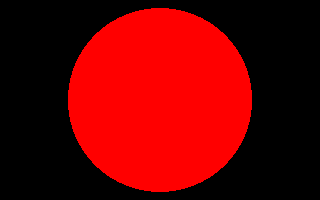

In [3]:
IPImage(filename = 'Output/output_image_01.png')

Defining the sphere and performing the first render reveals an almost 2D like shape, however this is actually the ray traced 3D image. To improve it we will need to add light, reflection and some shading.  
This method calculates the color of an object at a specific point based on the lighting and material properties:

In [ ]:
    def find_object_color(self, hit_object, hit_position, normal, scene):
        # define material, color, camera(camera - hit position) and color(ambient times color) variables
        material = hit_object.material
        obj_color = material.color_at(hit_position)
        to_camera = scene.camera - hit_position
        color = material.ambient * Color.from_hex("#000000")
        specular_k = 50

        # loop over every light and calc shading
        for light in scene.lights:
            # instantiate ray with hit position and light position minus hit position
            to_light = Ray(hit_position, light.position - hit_position)
            # diffuse shading (Lambert) must be posative
            color += (obj_color * material.diffuse * max(normal.dot_product(to_light.direction), 0))
            
            # Specular shading (Bling-Phong) must be posative
            half_vector = (to_light.direction + to_camera).normalize()
            color += light.color * material.specular * max(normal.dot_product(half_vector), 0) ** specular_k
        
        return color

Retrieve the material properties of the hit object and compute the direction to the camera. Loop through each light in the scene where colour is added. Compute the diffuse shading and specular shading. We return the computed colour for the object at the hit position.

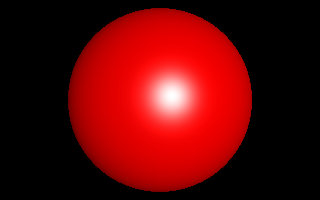

In [4]:
IPImage(filename = 'Output/output_image_02.png')

This sphere is more convincing and reveals the 3D object once diffuse and specular shading are combined. We can include the scene and add another object. We have a *Main* class where I have included parameters for our scene. This can be abstracted to another class which can take all the scene arguments and create the scene (this way multiple scenes can be tested and rendered). Here I've directly added the example scene for simplicity.

In [ ]:
    OBJECTS = [
        # Ground Plane
        Sphere(
            Point(0, 10000.5, 1),
            10000.0,
            PlaneMaterial(
                color=Color.from_hex("#ADC2B8"),
                ambient=0.2,
                reflection=0.2,
            ),
        ),
        # Blue ball
        Sphere(Point(0.75, -0.1, 1), 0.6, Material(Color.from_hex("#0000FF"))),
        # Pink ball
        Sphere(Point(-0.75, -0.1, 2.25), 0.6, Material(Color.from_hex("#803980"))),
    ]
    
    # define lights - from spec sheet
    LIGHTS = [
        Light(Point(1.5, -0.5, -10), Color.from_hex("#FFFFFF")),
        Light(Point(-0.5, -10.5, 0), Color.from_hex("#E6E6E6")),
    ]

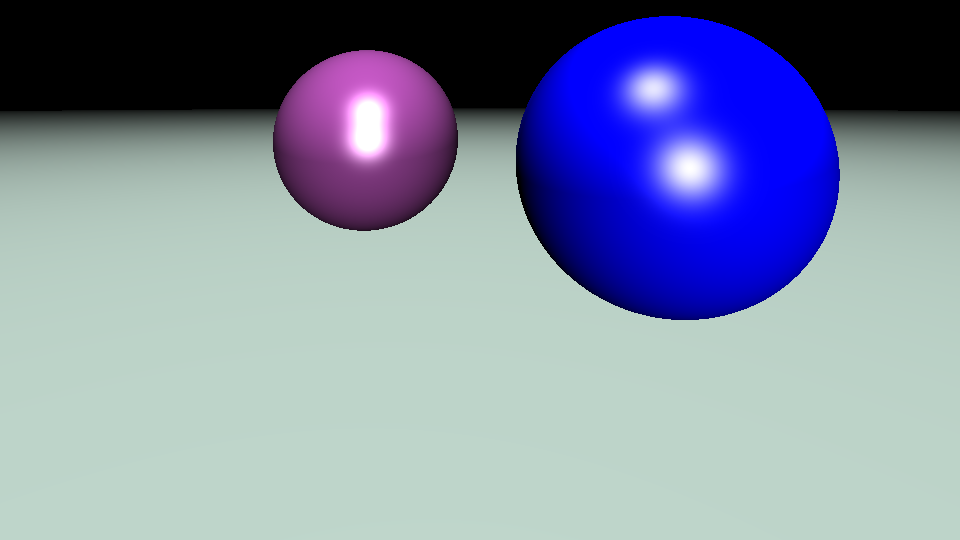

In [3]:
IPImage(filename = 'Output/output_image_03.png')

The latest image looks even better now. With a plane which is actually a sphere but it is simply very large, so we don't see the curvature. Our light sources are very well visible now, once we have two spheres.

Add depth and reflection to the ray tracing function in the engine.

In [ ]:
# calculate depth and reflection
if depth < self.MAX_DEPTH:
    new_ray_pos = hit_pos + hit_normal * self.MIN_DISPLACE
    new_ray_dir = (
        ray.direction - 2 * ray.direction.dot_product(hit_normal) * hit_normal
    )
    new_ray = Ray(new_ray_pos, new_ray_dir)
    # Attenuate the reflected ray by the reflection coefficient
    color += (
        self.ray_trace(new_ray, scene, depth + 1) * obj_hit.material.reflection
    )
    # Attenuate the reflected ray by the reflection coefficient (bounicng ray on every object)

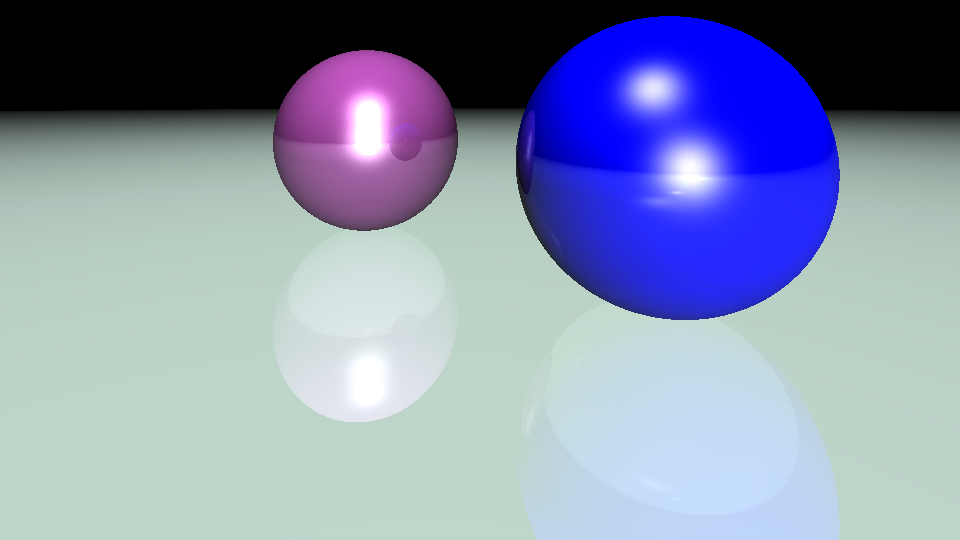

In [7]:
# latest render
sys.path.append(os.path.abspath("Ray Tracer/src"))
import main

# render example (run cell to render)
# executes main ray tracer function parameters: width, height
main_executable = main.main(960, 540)

Playing around with the light, reflection, depth and positions reveals much more in our image, showing how the objects in the scene interact with light and reflections.  

Finally we can reach a point where slight realism starts to show. Much more can be done to create and refine the realistic scene. We need to keep in mind render times since even the above scene might take more than 1 minute to render and it is not very complex. Different optimizations can be done to improve this such as Pypy which is a Python interpreter famed for it's speed.

## 4.0 Concluding Words

We have understood how a basic ray tracer can be implemented and what are the main building blocks:
- Camera Ray casting  
- Ray-object intersection  
- Dealing with object transformation  
- Lighting calculations  
- Recursive ray tracing

The algorithm of ray tracing is performed by tracing a path from an imaginary eye through each pixel in a virtual screen. Take an initial point and a direction, given as a vector. The point and vector determine a ray.

We saw the we will need to define our shapes mathematically on the scene. Next once our vector is cast towards the viewport we need to determine and calculate the intersection. Calculations and formulas here used will be based on the shape or surface we hit. 

## 5.0 Sources and Links

Links to sources, blogs, articles used in this work:



https://inst.eecs.berkeley.edu/~cs294-13/fa09/lectures/scribe-lecture1.pdf

https://math.hws.edu/eck/cs424/downloads/graphicsbook-linked.pdf#page=151&zoom=100,96,393

https://www.cl.cam.ac.uk/teaching/1718/AdvGraph/1.%20Ray%20Tracing%20-%20All%20the%20Maths.pdf

https://blog.scottlogic.com/2020/03/10/raytracer-how-to.html

https://groups.csail.mit.edu/graphics/classes/6.837/F00/Lecture16/lecture16.pdf

https://www.gophotonics.com/community/what-is-lambert-s-cosine-law

https://learnopengl.com/Advanced-Lighting/Advanced-Lighting

https://learnopengl.com/Lighting/Basic-Lighting

https://teaching.csse.uwa.edu.au/units/CITS3003/lectures/016_Shading_Models.pdf

https://arunrocks.com/ray-tracer-in-python-1-points-in-3d-space-show-notes/

https://raytracing.github.io/books/RayTracingInOneWeekend.html